# Introduction   
**Johns Hopkins University is playing a central role in collecting data globally on the coronavirus pandemic and sharing the information publicly (see screenshot of [web tool](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) below). Johns Hopkins has also made the underlying data available on a [github repository](https://github.com/CSSEGISandData/COVID-19). This notebook provides additional analysis of the Johns Hopkins' data and related data sources.**

* [Making Sense of Ambiguous Data](#section-intro)
* [Subways, Social Networks and the Coronavirus](#section-intro2)
* [Imports and Key Functions](#section-one)
* [Load Data and Initial Prep](#section-two)
* [Global Summary](#section-three)
* [Country Data and Comparisons](#section-four)
* [Extended US Data and Analysis](#section-five)
* [Appendix: Demographic Data](#section-six)

NOTE: Due to delays in reporting, some recent data may be missing/incomplete. 

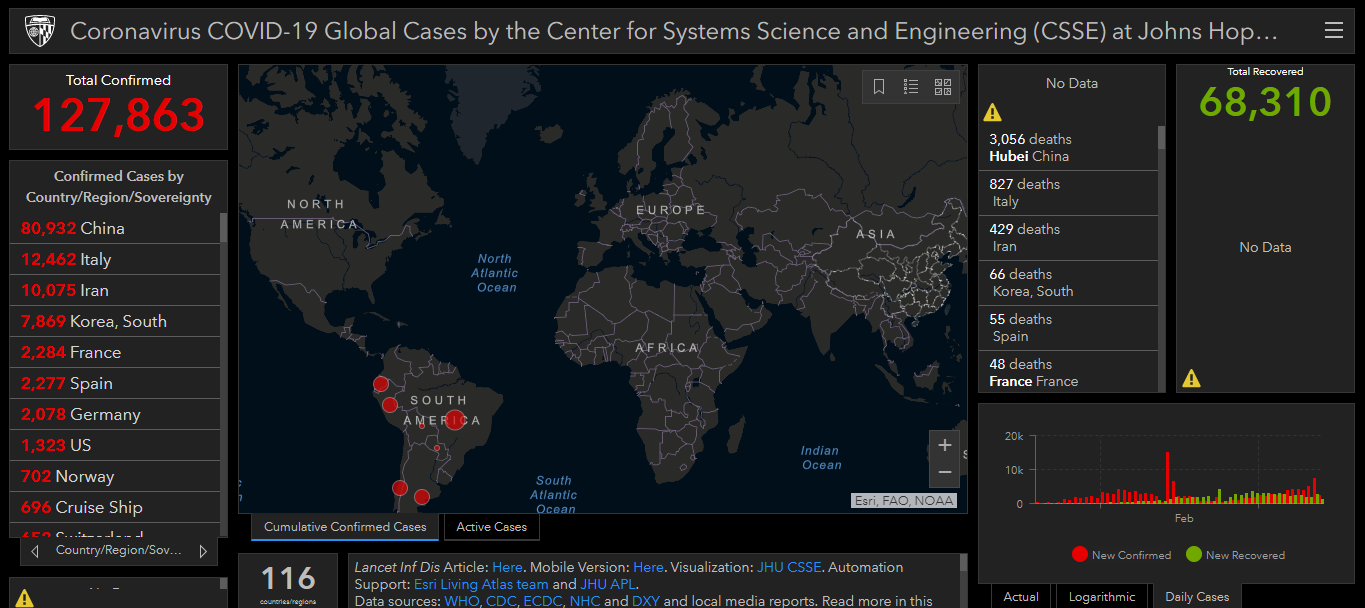


<a id="section-intro"></a>
### Coronavirus: Making Sense of Ambiguous Data 


New data on the coronavirus pandemic is made public virtually every minute, with each data point scrutinized for meaning.  But current data on the coronavirus must be viewed carefully and skeptically -- directionally at best.     

For example, two metrics receiving widespread attention are new daily confirmed cases and fatality rates. A key problem affecting both measures is that they rely on testing.  But testing is highly variable.  It is subject to local testing capacity, and most testing does not capture asymptomatic patients. As a result, some estimates put the number of actual coronavirus cases at five or even 10 times the confirmed rate.  In turn, this must be factored into fatality rates, as confirmed cases is the denominator of the fatality rate calculation (with number of deaths as numerator).  If we assume that the real number of confirmed cases is five times the current number, then an estimated fatality rate of 3.0% suddenly drops to 0.6%; a rate of 1.0% becomes 0.2%, very close to the seasonal flu.

As a result, number of deaths may be a more reliable indicator, as deaths are far more likely to be recorded. But some countries assign every death where coronavirus is present as a coronavirus death, while others record another factor (e.g., diabetes) as the primary cause, with coronavirus as a comorbidity.  Moreover, from a predictive standpoint,  deaths are a lagging indicator of the virus' spread, as the average time between onset of symptoms and death is about three weeks. The number of deaths is also greatly influenced by the efficacy of treatments and care, which can vary widely. 

Hospitalizations might be a good intermediate indicator between confirmed cases and deaths, but data on hospitalizations is not widely and consistently available.   

Lastly, there is date of symptom onset, which is sometimes available for at least a sample of cases.  In China's Hubei province, date of symptom onset clearly foreshadowed peak confirmed cases (more below).        

With the above in mind, the key questions come down to: (1) what are the actual de-noised trends -- especially around whether infection rates will grow exponentially and for how long; (2) what effect do containment tactics -- social distancing, testing and isolation, lockdowns, masks, etc. -- and other factors (e.g., demographics, climate) have on the numbers; and (3) what is the impact of emerging treatments on the death rate. Together, this mix of number-driven questions will determine the best courses of action going forward. 

- From Hubei (province in China where virus originated): Confirmed cases peaked about 12 days after lockdown; mapping of reported onset of symptoms to testing and confirmation shows a gap of about 10 days between peak onset of symptoms and peak confirmed; peak onset started about two days after lockdown (and stayed at peak for a few days); peak deaths trailed peak confirmed by about a week; confirmed daily cases dwindled about two weeks after peak confirmed.   
- Hong Kong, Singapore, Japan and South Korea (all Asian countries) have successfully limited/slowed the spread; past experience containing SARs/MERs may be a factor, as well as strong social norms, contact tracing, broad testing (esp. South Korea) and case isolation.  
- Testing issues are likely introducing significant anomalies in the data. For example: the US was slow to test, due to test design and production issues and reluctance by government officials to use some tests due to concerns about accuracy;  this is likely causing a more exponential curve in the US -- fewer cases caught earlier, with limited testing, more cases caught later, with improved testing; but limited testing clearly impacted the ability to isolate more cases; Chinese researchers [have found](https://pubmed.ncbi.nlm.nih.gov/32133832/?fbclid=IwAR3LHLplRtmPZED3jt_Hjf2ZKysmDcXMU5LgVgNPcqNAtb9EzcQBKMtCIoI) false-positive rates 50% or more of asympotatic close contacts of coronavirus patients; but the trade-off between false-positives vs. limited testing are unclear -- might be better to generate many false positives than limited testing (and thus sub-optimal) case isolation; overall, ["... no countries have reliable data on the prevalence of the virus in a representative random sample of the general population."](https://www.statnews.com/2020/03/17/a-fiasco-in-the-making-as-the-coronavirus-pandemic-takes-hold-we-are-making-decisions-without-reliable-data/); this inability to capture asymptomatic cases might be skewing the data heavily, understating infection rates and overstating death rates.    
- That said, [the Diamond Princess cruise ship may provide some clues](https://wattsupwiththat.com/2020/03/16/diamond-princess-mysteries/) about the overall population, as it represents something of a controlled trial with a relatively large sample: 83% of passengers did not get the virus (despite confined quarters over several weeks), relatively consistent across age groups; 49% of passengers with the virus showed no symptoms; the very young and the old were most likely to show no symptoms, with those in their 20s, 30s and 40s most likely to show symptoms; adjusting for age (a cruise ship's passengers skew toward the older), the death rate is estimated by one observer at 1.2% and much lower (more in the 0.5% range) by others, less than the 3% first assumed for coronavirus overall.  The coronavirus death rate appears likely higher than the 0.1% estimate for seasonal influenza, but for a variety of reasons (e.g., fact that the influenza rate is based on estimated -- not confirmed -- cases), the influenza rate and the coronavirus rate might not be as far apart as first thought.  
- The US Center for Disease Control (CDC) estimates that 12% of coronavirus cases require hospitalization; by contrast, this year's flu season will result in about 370,000 hospitalizations out of 30-50 million cases in the US.
- The time from symptom onset to death ranges from 2 to 8 weeks, according to an [analysis](https://www.who.int/docs/default-source/coronaviruse/who-china-joint-mission-on-covid-19-final-report.pdf) by the World Health Organization (WHO). 
- Digging into South Korea's success, [this article](http://(https://medium.com/@stevejang/flattening-the-curve-the-south-korean-approach-to-covid-19-49cb55d1e782)) reports that, according to a South Korean officials, 81% of outbreaks were tied to viral clusters, which included: office workplaces, churches, internet cafes, medical and long-term care facilities, schools, travel groups and fitness centers. 
- Climate may also play a role. Several studies ([from MIT](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3556998), [from Spain and Finland](https://www.medrxiv.org/content/10.1101/2020.03.12.20034728v1), and [from China](https://arxiv.org/ftp/arxiv/papers/2003/2003.05003.pdf)) appear to show that the virus is hindered by warmer temperatures -- above the 50 or 60 degree mark -- similar to seasonal flu.  
- [A prominent Israeli researcher](https://www.haaretz.com/israel-news/.premium.MAGAZINE-israeli-expert-trump-is-right-about-covid-19-who-is-wrong-1.8691031) takes issue with the current portrayal of how exponential growth works for diseases: "We do not move about in space like particles,” says Dan Yamin, of Tel Aviv University’s industrial engineering department. “Try to remember what you did yesterday. Even without all the social distancing measures, you probably would have met the same people you met today. We move across networks of social contact. So, from a certain stage, it will be difficult to infect even those who bear a potential for becoming infected, because the carriers don’t wander around looking for new people to infect.” In other words,after an initial flash of contagion to close contacts, most clusters flame out due to a dearth of new close contacts to infect. He also notes, as others do, that fatality rates are overstated due to the fact that testing is focused on more severe cases: “The actual number of people who are sick with the virus in South Korea is at least double what’s being reported, so the chance of dying is at least twice as low, standing at about 0.45 percent – very far from the World Health Organization’s [global mortality] figure of 3.4 percent. And that’s already a reason for cautious optimism.”
- [Research](https://www.medrxiv.org/content/10.1101/2020.02.16.20023820v2) by US academics based on "math graph theory" comes to a similar conclusion. Graph theory analyzes social networks (e.g., Twitter), looking at people as nodes and mapping all their connections to each other. Unlike some social networks, where any person or node can easily interact with another ("random networks"), human networks resemble so-called small world networks, where people generally have a limited number of people with whom they have frequent interactions -- they behave more like cliques.  With human networks, infection grows exponentially at first, but then settles to a less-than-exponential growth rate as the strength of connections between people diminish -- and then runs out of people in the clique to infect. ["Exponential growth is not maintained because 'the number of susceptible individuals around an infected individual decays with time.'"](https://www.zdnet.com/article/graph-theory-suggests-covid-19-might-be-a-small-world-after-all/)
- One widely circulated -- but also widely challenged -- [article](https://www.zerohedge.com/health/covid-19-evidence-over-hysteria) argued that worries over the coronavirus are significantly overblown. One of the article's points is relatively straightforward: the widely followed Johns Hopkins visualization (screenshot above) presents cumulative cases with ominous-looking red bubbles on a map, stoking fear; but more than half of the data accounted for in the red bubbles represent inactive cases, and they fail to capture other context, such as cases per capita and case severity. For example (as of March 20), the US and German each had just under 20K cases, but the US numbers represented 59 cases per million in US population, compared with 237 per million for Germany, or about one-quarter the rate on a per capita basis.  
- Notwithstanding the chance for more optimistic outcomes, many argue that we need to take very aggressive and costly actions to counter the virus in the face of a highly improbable yet potentially ruinous "Black Swan"-like event.  Made famous by Nassim Nicholas Taleb, Black Swans are characterized by low, uncertain probability but huge negative potential outcomes ("fat tails").  [Black Swan theorists mandate quick action](https://twitter.com/nntaleb/status/1239933769982840832/photo/1) against such threats -- the earlier, the better -- as costs to counter Black Swans also grow exponentially with time.  In essence, the actions are insurance against an unlikely but possible catastrophe. The cost of insurance skyrockets with time as we move along the path to a possible Black Swan event. 
- As the pandemic progresses and more data become available, there is more focus on comparing the efficacy of wholesale lockdowns versus more targeted and less sweeping interventions (e.g., wearing masks in public).  [This article](https://medium.com/@yinonweiss/lets-visualize-state-by-state-shutdown-effectiveness-on-covid-19-e13a5cdb50ad) finds little to no correlation between how quickly a state went on lockdown and subsequent deaths.     

In the end, it is not a contradiction to expect the virus to play out largely along small world network dynamics, while taking immediate, aggressive steps to hedge against a Black Swan-like event. As the data become more clear, tactics can be adjusted accordingly.   
  
  
 
Suggested reading/visualizations:   
- https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 -- Johns Hopkins visualization   
- https://www.healthmap.org/covid-19/ -- visualization       
- https://www.worldometers.info/coronavirus/ -- visualization  
- https://ourworldindata.org/coronavirus -- analysis/visualization  
- https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html -- US CDC data/visualization 
- https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca -- broad and thorough analysis of data; see "Timeline of Events in Hubei" chart below (Hubei is a province in China; its capital city is Wuhan, where the first case of coronavirus was identified)    
- https://wattsupwiththat.com/2020/03/16/diamond-princess-mysteries/ -- analysis of cruise ship data       
- https://www.calcalistech.com/ctech/articles/0,7340,L-3800632,00.html  -- "Corona Is Slowing Down, Humanity Will Survive, Says Biophysicist Michael Levitt"   
- https://www.statnews.com/2020/03/17/a-fiasco-in-the-making-as-the-coronavirus-pandemic-takes-hold-we-are-making-decisions-without-reliable-data/    
- https://medium.com/@stevejang/flattening-the-curve-the-south-korean-approach-to-covid-19-49cb55d1e782 -- Deep analysis of South Korea's success
- https://www.zdnet.com/article/graph-theory-suggests-covid-19-might-be-a-small-world-after-all/ -- small world networks (this and next two links) 
- https://news.umich.edu/containment-efforts-appear-to-step-covid-19-spread-down-from-exponential-norm/ 
- https://www.medrxiv.org/content/10.1101/2020.02.16.20023820v2.full.pdf -- detailed scientific report on small world networks 
- https://www.nicholaslewis.org/why-herd-immunity-to-covid-19-is-reached-much-earlier-than-thought/, https://arxiv.org/abs/2005.03085 and https://www.medrxiv.org/content/10.1101/2020.04.27.20081893v1.full.pdf -- three papers that argue that traditional estimates of the percent of the population needed to be infected to develop herd immunity (60-70 percent) are overstated, as there is wide variability within populations in terms of susceptibility to the disease and propensity to spread it. 


<a id="section-intro2"></a>
Published on *Medium *

### Subways, Social Networks and the Coronavirus
Robert McKee
Apr 19 · 4 min read



*Updated: May 11, 2020*  
  
Much has been made of the mathematical model from the University of Washington’s Institute for Health Metrics and Evaluation (IHME) that originally predicted as many as 2.2 million U.S. deaths from the coronavirus. IHME has revised that number downward to about 60 thousand deaths, but the Washington Post still has called it “America’s most influential coronavirus model.”

Fierce debate surrounds the model’s inputs and predictions, but what if its underlying premise is incorrect?

The gist of the argument is this: the IHME and other traditional models assume what French mathematician David Madore calls “perfect mixing: any individual is equally likely to infect any other individual.” But does this reflect reality?

Another school of thought — given far less media and public policy attention — borrows from research into social networks on the web. These networks are called “graphs” and are visualized as “nodes” or “vertices” connected by lines. The visualizations often show people and their connections (e.g., their Facebook friends).

Using the lens of a social network, traditional epidemic models assume that any individual can infect any other individual. Simplified, the models’ social network looks something like this:

![](https://cdn-images-1.medium.com/max/750/1*v7WFs2HWyau6Ot3Eywg-gA.png)


However, networks do not need to be completely connected. There is another network model called “small world networks.” Here, people organize into various clusters or cliques (e.g., family, friends, colleagues). This is how such a small world network might look:

![](https://cdn-images-1.medium.com/max/750/1*xKhrTwVd_LA3KXu7R6uu9A.png)

The example above shows connections between real people for the purpose of tracking an outbreak of sexually transmitted diseases. The key point is that in real life people tend to cluster together, with some “nodes” or people connecting the various groups. People with a lot of inter-group connections can be viewed as super influencers — or super spreaders. When companies want to reach the most people with a marketing message, they target these super influencers. The messages then cascade across the network “virally.”

A research report from the University of Michigan argues that such small world networks apply to the coronavirus. Accordingly, the virus spreads mainly through cliques. At first, the virus spreads exponentially, but this levels off and then drops sharply as the supply of nearby uninfected targets (people or nodes) is exhausted.
Which brings us to subways.

Here is a striking slide from the White House’s April 18 update on the coronavirus, showing cumulative coronavirus cases in the U.S.’s top 25 metro areas:

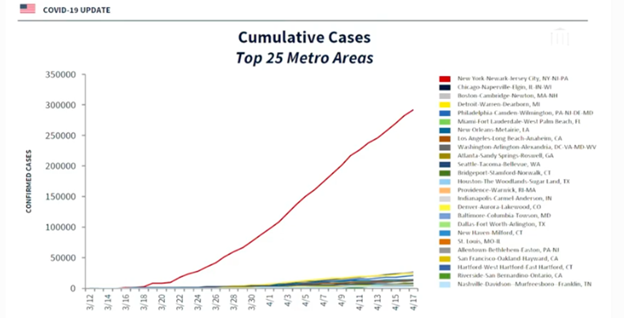


Clearly, something different is going on in the New York City metro area. And the answer might be the subways, according to researchers at MIT, who argue: “New York City’s multitentacled subway system was a major disseminator — if not the principal transmission vehicle — of coronavirus infection during the initial takeoff of the massive epidemic that became evident throughout the city during March 2020.”

In a series of tweets, political commentator Buck Sexton summarized the MIT findings this way:
“New Yorkers have thought all along that the subway was the covid-19 super spread[.] But with the panic driven lockdown, authorities took a virus that had already spread widely and forced people into more crowded subway cars and buses with limited service. This made it worse….
“So once the subway lines had already help spread this disease to 10,000s of NYC residents, the city authorities told everyone to lockdown at home[.] Queens and Brooklyn have a huge number of multigenerational families living under one roof[.] Such [i]ntra-familial spread can be lethal.”

And so this is the alternative to “perfect mixing”: The spread is largely through clusters of families, friends and colleagues — small world networks — with the subway connecting otherwise disparate nodes. The subway itself acts as a super spreader.

Viewing the virus through the lens of a small world network also impacts thinking about herd immunity, or how much of the population has to have had the disease and developed immunity to curtail further spreading. Traditional models peg that number at 60 or 70 percent. But, again, traditional models treat all people (or nodes) as equals — they are equally likely to catch or spread the disease. But a number of new papers (here, here and here) argue that if enough super spreaders develop immunity, then the 60 or 70 percent level can drop into the 20 percent or so range. Meaning only 20 percent of the population (if made up mostly of super spreaders) needs to have developed immunity to check the growth of the disease.

Final note: some have argued that the traditional models did their job of communicating danger and prompting action. But like the models’ underlying premise of random mixing, policy interventions have been broad and sweeping. The small world model suggests more targeted actions aimed at specific clusters (e.g., nursing homes) and key nodes (super spreaders).

Key Chart on Timeline of Events in Hubei (from https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca)

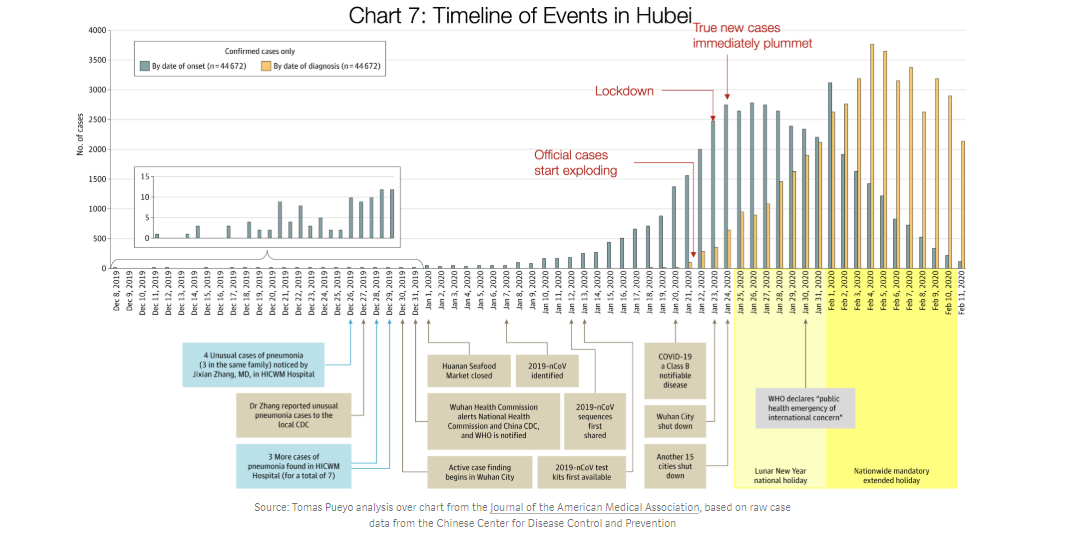

<a id="section-one"></a>
# Imports and Key Functions 

In [ ]:
import numpy as np
import pandas as pd
import gc
import math 
import pickle
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-poster') 
# style.use('ggplot')
plt.rcParams["date.autoformatter.day"] = "%Y-%m-%d"
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)


import requests
import io

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Print available file names (data imported to this kernel); note: we will access some files directly from Johns Hopkins and other sources -- see next cells 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Assign World Bank data files (posted to this kernel) to variables  
file_world_bank_pop='../input/world-bank-country-demographics/World_Bank_Pop_by_Country.csv'
file_world_bank_age65='../input/world-bank-country-demographics/World_Bank_Age_65plus_by_Country.csv'
file_pop_density = '../input/world-bank-country-demographics/World_Bank_Pop_Density.csv'
file_df_demographics='../input/world-bank-country-demographics/df_demographics.pkl'

# Assign CDC data files (posted to this kernel) to variables
file_cdc_onset= '../input/cdc-coronavirus-03-25/CDC_onset_date.csv'

In [ ]:
# To access files directly from Hopkins' github, use these variables/URLs
file_confirmed ='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Country data, derived from Johns Hopkins and other sources, is available here:  
file_regions_deaths= 'https://coviddata.github.io/coviddata/v1/regions/deaths.csv'
file_regions_cases= 'https://coviddata.github.io/coviddata/v1/regions/cases.csv'

Functions and key variables 

In [ ]:
def prep_data(filename, colname):
    '''
    Reads coronavirus csv file and edits/reshapes it, including turning date columns into rows/obseravtions.
    
    filename: the name of the csv file to be imported.
    colname: the name of a new column to be added to the data.
    returns: a dataframe with the edited/reshaped data.     
    '''
    df=pd.read_csv(filename)
    df=pd.melt(df, id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='Date', value_name=colname)
    df=df[['Date','Country/Region', 'Province/State', 'Lat', 'Long', colname]]
    df['Date']= pd.to_datetime(df['Date'])
    return df  

def prep_region_data(filename, colname):
    '''
    Reads coronavirus csv file and edits/reshapes it, including turning date columns into rows/obseravtions.
    
    filename: the name of the csv file to be imported.
    colname: the name of a new column to be added to the data.
    returns: a dataframe with the edited/reshaped data.     
    '''
    df=pd.read_csv(filename)
    df=pd.melt(df, id_vars=['Country', 'Region'], var_name='Date', value_name=colname)
    df=df[['Date','Country', 'Region', colname]]
    df['Date']= pd.to_datetime(df['Date'])
    return df  

def calc_daily_numbers(df):
    '''
    Calculates the daily numbers from the rolling cumulative data.
    df: dataframe with the underlying data.
    returns: an expanded dataframe with the daily breakouts.
    '''
    df['Number_Confirmed_Day'] = df['Number_Confirmed'].diff().fillna(df['Number_Confirmed'])
#     df['Number_Recovered_Day'] = df['Number_Recovered'].diff().fillna(df['Number_Recovered'])
    df['Number_Deaths_Day'] = df['Number_Deaths'].diff().fillna(df['Number_Deaths'])
    return df


In [ ]:
# Get yesterday's date (GMT-based)
last_date = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
print("Last date in dataset:  ", last_date)

<a id="section-two"></a>
# Load Data and Initial Prep

Read in the Data Files and Combine Into Master Dataframe

In [ ]:
df_confirmed=prep_data(file_confirmed, 'Number_Confirmed')
df_confirmed.tail()

In [ ]:
df_deaths=prep_data(file_deaths, 'Number_Deaths')
df_deaths=df_deaths[['Date', 'Country/Region', 'Province/State', 'Number_Deaths']]
df_deaths.tail()

In [ ]:
# Merge into one dataframe 
df_master = df_confirmed.merge(df_deaths, on=['Date', 'Country/Region', 'Province/State'])
df_master[['Country/Region', 'Province/State']]=df_master[['Country/Region', 'Province/State']].fillna(value='NA')
df_master[['Number_Confirmed', 'Number_Deaths']]=df_master[['Number_Confirmed', 'Number_Deaths']].fillna(value=0)
df_master=df_master[['Date', 'Country/Region', 'Province/State','Lat', 'Long','Number_Confirmed', 'Number_Deaths']]
df_master

In [ ]:
# Check
df_master.loc[df_master['Country/Region']=='US'].tail(20)

List of All Countries/Regions in Dataset 

In [ ]:
sorted(df_master['Country/Region'].unique())

Aggregate data by date and country/region

In [ ]:
df_master_country=df_master.copy()
df_master_country.drop(columns=['Province/State'], inplace=True)
df_master_country=df_master_country.groupby(['Date', 'Country/Region'])['Number_Confirmed', 
       'Number_Deaths'].agg('sum').reset_index()
df_master_country

In [ ]:
# Look at one country 
country='Germany'
df_master_country.loc[df_master_country['Country/Region']==country][-10:]

<a id="section-three"></a>
# Global Summary 

In [ ]:
# Aggregate data globally by date
df_global=df_master_country.groupby(['Date']).agg('sum').reset_index()
df_global.tail()

Derive daily numbers from the cumulative sums

In [ ]:
df_global['Number_Confirmed_Daily'] = df_global['Number_Confirmed'].diff().fillna(
        df_global['Number_Confirmed'])
df_global['Number_Deaths_Daily'] = df_global['Number_Deaths'].diff().fillna(
        df_global['Number_Deaths'])
df_global.tail()

#### Global Coronavirus Trends - Cumulative and Daily[](http://)

In [ ]:
df_global.plot(x='Date', y=['Number_Confirmed', 'Number_Deaths'], kind='line', title="Global Coronavirus Trends-Cumulative")

In [ ]:
df_global_copy=df_global.copy()[-60:]
df_global_copy['Date']=df_global_copy['Date'].dt.strftime('%Y-%m-%d')
df_global_copy.plot(x='Date', y=['Number_Confirmed_Daily', 'Number_Deaths_Daily'], kind='bar', 
                    title="Global Coronavirus Trends - Daily", fontsize=8)
plt.xticks(rotation=45)
sns.set_context('poster') 
plt.show

<a id="section-four"></a>
# Country Data 

In [ ]:
# Countries sorted by Number Confirmed as of last date
df_sorted=df_master_country.loc[df_master_country['Date']==last_date]
df_sorted=df_sorted.sort_values(by=['Number_Confirmed'], ascending=False).reset_index(drop=True)
df_sorted.index = df_sorted.index + 1
df_sorted.head(20)

In [ ]:
# top 10 countries
country_list=list(df_sorted['Country/Region']) 
# country_list=[c for c in country_list if c != 'Others']
country_list=country_list[:10]
country_list

In [ ]:
df_grouped_daily=df_master_country.groupby('Country/Region').apply(lambda x: x.reset_index(drop=True)).drop(['Country/Region'],axis=1).reset_index()
df_grouped_daily.drop(columns=['level_1'], inplace=True)
df_grouped_daily.head()

In [ ]:
df_grouped_daily['Number_Confirmed_Daily'] = df_grouped_daily.groupby(
    'Country/Region')['Number_Confirmed'].diff().fillna(
        df_grouped_daily['Number_Confirmed'])
df_grouped_daily['Number_Deaths_Daily'] = df_grouped_daily.groupby(
    'Country/Region')['Number_Deaths'].diff().fillna(
        df_grouped_daily['Number_Deaths'])
df_grouped_daily.tail()

In [ ]:
# Check one country 
country_view='US'
df_grouped_daily.loc[df_grouped_daily['Country/Region']==country_view][-10:]

### Death Rates Per Confirmed Case

In [ ]:
df_grouped_daily['Death_Rate']=df_grouped_daily['Number_Deaths'] * 100 / df_grouped_daily['Number_Confirmed']
# Check
df_grouped_daily.loc[df_grouped_daily['Country/Region']=='Korea, South'][-5:]

Comparative Death Rates as of Last Date 

In [ ]:
df_comp_deaths = df_grouped_daily.loc[(
    df_grouped_daily['Date'] == last_date)]
df_comp_deaths = df_comp_deaths.sort_values(
    by=['Death_Rate'],
    ascending=False).dropna(axis=0).reset_index()
df_comp_deaths.index+=1
df_comp_deaths=df_comp_deaths[['Date', 'Country/Region', 'Number_Confirmed', 'Number_Deaths', 'Death_Rate']]
# Death rate - minimum of n confirmed cases 
min_n=500
df_comp_deaths.loc[df_comp_deaths['Number_Confirmed']>=min_n]

### Demographic Data 

See the Appendix for process for importing and prepping data from the World Bank on country populations, percentage of elderly for each country and population density (people/km). Here, the already-prepped dataframe is loaded and the demographic information is appended to the master file.

In [ ]:
df_demographics=pd.read_pickle(file_df_demographics)
df_demographics

In [ ]:
# Append demograohic data to master data  
df_grouped_daily=df_grouped_daily.merge(df_demographics, how='left', on=['Country/Region'])
# Check 
df_grouped_daily.loc[df_grouped_daily['Country/Region']=='US'][-5:]

### Cases Per Million in Population

In [ ]:
# Add column on # cases/population 
df_grouped_daily['Confirmed_Per_Mil']=df_grouped_daily['Number_Confirmed'] * 1_000_000 / df_grouped_daily['2018_Tot_Pop']
# Rank countries by cases per million for last date
df_comp_percentages = df_grouped_daily.loc[(
    df_grouped_daily['Date'] == last_date)]
df_comp_percentages = df_comp_percentages.sort_values(
    by=['Confirmed_Per_Mil'],
    ascending=False).dropna(axis=0).reset_index()
df_comp_percentages.index+=1
df_comp_percentages=df_comp_percentages[['Date', 'Country/Region', 'Number_Confirmed', '2018_Tot_Pop', 'Confirmed_Per_Mil']]
df_comp_percentages

### Country Results for Last N Days 

In [ ]:
# Results from last n days 
from datetime import datetime, timedelta
last_n_days=3
date_start = datetime.today() - timedelta(days=last_n_days)
print("Last n days = " + str(last_n_days))
print("Start date = " + date_start.strftime('%Y-%m-%d'))

In [ ]:
df_grouped_last_n=df_grouped_daily.loc[df_grouped_daily['Date'] > date_start]
df_grouped_last_n.head()

In [ ]:
df_sorted_last_n=df_grouped_last_n.sort_values(by=['Number_Confirmed'], ascending=False).reset_index(drop=True)
df_sorted_last_n.index = df_sorted_last_n.index + 1
df_sorted_last_n.head()

#### Country Totals for Last N Days 

In [ ]:
# Last n days grouped by country 
df_sorted_last_n_grouped=df_sorted_last_n.groupby(['Country/Region'])['Number_Confirmed_Daily', 
       'Number_Deaths_Daily'].agg('sum')
df_sorted_last_n_grouped=df_sorted_last_n_grouped.sort_values(
    by=['Number_Confirmed_Daily'],
    ascending=False).dropna(axis=0).reset_index()
df_sorted_last_n_grouped.index+=1
print("Totals from Last "+ str(last_n_days) + " Days")
df_sorted_last_n_grouped

### Country Numbers (Cumulative) for Last Date 

In [ ]:
df_sorted_=df_grouped_daily.loc[df_grouped_daily['Date']==last_date]
df_sorted=df_sorted.sort_values(by=['Number_Confirmed'], ascending=False).reset_index(drop=True)
df_sorted.index = df_sorted.index + 1
df_sorted.head(10)

### Country-Specific Analyses

In [ ]:
# Example -- any country
country='US'
df_country=df_grouped_daily.loc[df_grouped_daily['Country/Region']== country].copy()
df_country.tail()

In [ ]:
df_country=df_grouped_daily.loc[df_grouped_daily['Country/Region']== country].copy()
df_country=df_country.loc[df_country['Date'] > '02-20-2020']
df_country.plot(x='Date', y=['Number_Confirmed', 'Number_Deaths'], kind='line', title=country + " Coronavirus Trends - Cumulative")
sns.set_context('poster') 

In [ ]:
# Without rolling average 
df_country_copy=df_country.copy()
df_country_copy['Date']=df_country_copy['Date'].dt.strftime('%Y-%m-%d')
max_y=max(df_country_copy['Number_Confirmed_Daily'])
max_y=int(math.ceil(max_y / 1000.0)) * 1000 + 1_000
df_country_copy.plot(x="Date", y=['Number_Confirmed_Daily'], kind='bar', title=country + " Coronavirus Trends - Cases", fontsize=10, color='b')
plt.xticks(rotation=45, fontsize=8)
sns.set_context('poster') 
plt.ylim([0, max_y])
plt.show()

In [ ]:
# Add rolling averages
df_country_copy=df_country.copy()
rolling_window=7
df_country_copy['Rolling_Confirmed']=df_country_copy['Number_Confirmed_Daily'].rolling(window=rolling_window).mean().fillna(0)
df_country_copy['Rolling_Deaths']=df_country_copy['Number_Deaths_Daily'].rolling(window=rolling_window).mean().fillna(0)
df_country_copy

In [ ]:
#Plot with rolling average 
df_country_copy['Date']=df_country_copy['Date'].dt.strftime('%Y-%m-%d')
max_y=max(df_country_copy['Number_Confirmed_Daily'])
max_y=int(math.ceil(max_y / 1000.0)) * 1000 + 1_000
df_country_copy.plot(x="Date", y=['Number_Confirmed_Daily'], kind='bar', title=country + " Coronavirus Trends - Cases", fontsize=10, color='b')
plt.plot(df_country_copy["Date"], df_country_copy['Rolling_Confirmed'], color='b', label='Rolling_Average')
plt.xticks(rotation=45, fontsize=8)
plt.legend(loc='upper left', fontsize=12)
sns.set_context('poster') 
plt.ylim([0, max_y])
plt.xlim(left=+30) # Picks up x values (dates) 30 days from start
plt.show()
plt.clf()

In [ ]:
# Plot deaths
df_country_copy.plot(x="Date", y=['Number_Deaths_Daily'], 
                     kind='bar', title=country + " Coronavirus Trends - Deaths", fontsize=10, color='r')
plt.plot(df_country_copy["Date"], df_country_copy['Rolling_Deaths'], color='r', label='Rolling_Average')
plt.xticks(rotation=45, fontsize=8)
plt.xlim(left=+30)
plt.legend(loc='upper left', fontsize=12)
plt.show()
plt.clf()

In [ ]:
# Review detail 
df_country_copy

### Comparison of Countries After Hitting Case Threshold

In [ ]:
df_n_cases=df_grouped_daily.copy()
df_n_cases=df_n_cases[['Country/Region', 'Date', 'Number_Confirmed']]
df_n_cases.head()

In [ ]:
case_threshhold=100
df_n_cases=df_n_cases.loc[df_n_cases['Number_Confirmed'] >= case_threshhold]
df_n_cases.reset_index(drop=True, inplace=True) 
print("Case threshhold = " + str(case_threshhold))
df_n_cases.head(10)

In [ ]:
# Add cum count of days by country after hitting threshhold  
df_n_cases['Day']=df_n_cases.groupby(['Country/Region']).cumcount()
df_n_cases.head(10)

In [ ]:
# Remove cases designated as "Cruise Ship"
df_n_cases=df_n_cases.loc[df_n_cases['Country/Region']!='Cruise Ship']

In [ ]:
# Build dataframe with comparative countries 
comp_countries=['Iran', 'Italy', 'Japan',
       'Korea, South', 'Singapore', 'US', 'France', 'Spain', 'Germany', 'United Kingdom']
df_comps=df_n_cases.loc[df_n_cases['Country/Region'].isin(comp_countries)]

In [ ]:
import math 
import seaborn as sns


max_confirmed=max(df_comps['Number_Confirmed'])
max_confirmed=int(math.ceil(max_confirmed / 1000.0)) * 1000 + 100_000
ax=sns.lineplot(
    data=df_comps, x='Day', y='Number_Confirmed', hue='Country/Region'
).set_title(
    'Trend from Selected Countries After Hitting Confirmed Cases Threshold', fontsize=16)
plt.xlabel('Days Since Hitting Threshold')
# sns.set_context('poster')  
plt.axis([0, 60, 100, max_confirmed])
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Trend by Confirmed Cases per Million of Population 

In [ ]:
case_threshhold_mil=5
df_n_cases_mil=df_grouped_daily.copy()
df_n_cases_mil=df_n_cases_mil[['Country/Region', 'Date', 'Confirmed_Per_Mil']]
df_n_cases_mil=df_n_cases_mil.loc[df_n_cases_mil['Confirmed_Per_Mil'] >= case_threshhold_mil]
df_n_cases_mil.reset_index(drop=True, inplace=True) 
print("Case threshhold_mil = " + str(case_threshhold_mil))
df_n_cases_mil.head(10)

In [ ]:
# Add cum count of days by country after hitting threshhold  
df_n_cases_mil['Day']=df_n_cases_mil.groupby(['Country/Region']).cumcount()
df_n_cases_mil.head(10)

In [ ]:
# Check
df_n_cases_mil.loc[df_n_cases_mil['Country/Region']== 'United Kingdom']

In [ ]:
# Build dataframe with comparative countries 
comp_countries=['Japan',
       'Korea, South', 'Singapore', 'US', 'France', 'Spain', 'Germany', 'United Kingdom', 'Italy', 'Sweden']
df_comps_mil=df_n_cases_mil.loc[df_n_cases_mil['Country/Region'].isin(comp_countries)]

In [ ]:
marker = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
markers=[marker[i] for i in range(len(comp_countries))]
plt.figure(figsize=(16, 12))
ax=sns.lineplot(
    data=df_comps_mil, x='Day', y='Confirmed_Per_Mil', hue='Country/Region', style='Country/Region', markers=markers, dashes=False
).set_title(
    'Trend from Selected Countries After Hitting Confirmed Per Mil Cases Threshold', fontsize=16)
plt.xlabel('Days Since Hitting Threshold')
plt.axis([0, 100, 5, 6_000])
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Confirmed Per Million by Most Recent Day of Selected Countries 
df_comps_mil.groupby(['Country/Region']).tail(1).sort_values(by='Confirmed_Per_Mil', ascending=False)

Deaths Per Million in Population

In [ ]:
min_deaths=100
df_n_deaths_mil=df_grouped_daily.copy()
df_n_deaths_mil=df_n_deaths_mil[['Country/Region', 'Date', '2018_Tot_Pop', 'Number_Deaths']]
df_n_deaths_mil.reset_index(drop=True, inplace=True) 
df_n_deaths_mil=df_n_deaths_mil.loc[df_n_deaths_mil['Number_Deaths']>=min_deaths]
df_n_deaths_mil['Number_Deaths_Mil']=df_n_deaths_mil['Number_Deaths'] / ( df_n_deaths_mil['2018_Tot_Pop'] / 1_000_000) 
df_n_deaths_mil=df_n_deaths_mil.groupby(['Country/Region']).tail(1).sort_values(by='Number_Deaths_Mil', ascending=False).reset_index(drop=True)
df_n_deaths_mil


In [ ]:
fig = plt.figure(figsize=(12,14))
plt.barh(df_n_deaths_mil['Country/Region'], df_n_deaths_mil['Number_Deaths_Mil'])
_ = plt.xticks(rotation=30, fontsize=10)
_ = plt.yticks(fontsize=10)
_ = plt.legend(fontsize=12, loc='center right')
_ = plt.title('Deaths Per Million in Population (Min ' + str(min_deaths) + ' Deaths)')
_ = plt.gca().invert_yaxis()
_ = plt.show()

View Last n Days

In [ ]:
# Look at data from last three days 
three_days_ago=datetime.strftime(datetime.now() - timedelta(3), '%Y-%m-%d')
df_comps.loc[df_comps['Date']>=three_days_ago]

Look at One Country's Data 

In [ ]:
target_country='United Kingdom'
df_comps.loc[df_comps['Country/Region']==target_country]

In [ ]:
# Add demographic context 
df_comps=df_comps.merge(df_demographics, on='Country/Region')
df_comps['Confirmed_Per_Mil']=df_comps['Number_Confirmed'] * 1_000_000 / df_comps['2018_Tot_Pop']
df_comps=df_comps[['Country/Region', 'Date', 'Day', 'Number_Confirmed', 'Confirmed_Per_Mil', '2018_Tot_Pop',
       '2018_Age_65_Percent', '2018_Pop_Density']]
df_comps.head()

In [ ]:
# Compare countries by Number_Confirmed and days since passing threshhold
days_since=24
df_comps[df_comps['Day']==days_since].sort_values(by='Number_Confirmed', ascending=False)

In [ ]:
# Compare countries by Number_Confirmed PER MILLION and days since passing threshhold
df_comps[df_comps['Day']==days_since].sort_values(by='Confirmed_Per_Mil', ascending=False)

<a id="section-five"></a>
# Extended US Data and Analysis 

In [ ]:
df_country_cases=prep_region_data(file_regions_cases, "Number_Confirmed")
df_country_deaths=prep_region_data(file_regions_deaths, "Number_Deaths")
df_country_combined=df_country_cases.merge(df_country_deaths,how='left', on=['Date', 'Country', 'Region'])
df_country_combined

In [ ]:
# Review any country 
# country_name='France'
# df_country_cases=df_country_combined.loc[df_country_combined['Country']==country_name].copy()

In [ ]:
# US-specific analysis 
country_name='United States'
df_country_cases=df_country_combined.loc[df_country_combined['Country']==country_name].copy()
df_US_states=df_country_cases
df_US_states

In [ ]:
# Check
df_US_states.loc[df_US_states['Region']=='New York']

In [ ]:
# Map all values containing "Diamond Princess"to just "Diamond Princess"
df_US_states['Region']=np.where(df_US_states['Region'].str.contains('Diamond Princess'), 'Diamond Princess', df_US_states['Region'])
df_US_states

In [ ]:
# Extract state abbreviation from city/state string 
df_US_states['Region']=df_US_states['Region'].apply(lambda x: x.split(", ")) # Note space after comma 
df_US_states['Region']=df_US_states['Region'].apply(lambda x: x[-1])
df_US_states.tail(10)

In [ ]:
# Dictionary of state abreviations and names 
states={"AL":"Alabama", "AK":"Alaska", "AS":"American Samoa", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", 
        "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware", "DC":"District Of Columbia", 
        "FM":"Federated States Of Micronesia", "FL":"Florida", "GA":"Georgia", "GU":"Guam", "HI":"Hawaii", "ID":"Idaho", 
        "IL":"Illinois", "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", 
        "MH":"Marshall Islands", "MD":"Maryland", "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", 
        "MS":"Mississippi", "MO":"Missouri", "MT":"Montana", "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire",
        "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", "NC":"North Carolina", "ND":"North Dakota", 
        "MP":"Northern Mariana Islands", "OH":"Ohio", "OK":"Oklahoma", "OR":"Oregon", "PW":"Palau", "PA":"Pennsylvania", 
        "PR":"Puerto Rico", "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee",
        "TX":"Texas", "UT":"Utah", "VT":"Vermont", "VI":"Virgin Islands", "VA":"Virginia", "WA":"Washington",
        "WV":"West Virginia", "WI":"Wisconsin", "WY":"Wyoming"}

In [ ]:
# Map the state abbrevs to state names 
df_US_states['Region']=df_US_states['Region'].map(states).fillna(df_US_states['Region'])
df_US_states.head(10)

In [ ]:
# See numbers by state for last date 
df_US_states.loc[df_US_states['Date']==last_date].sort_values(by='Number_Confirmed', ascending=False)

In [ ]:
# Aggregate by state and date 
df_US_states=df_US_states.groupby(['Date', 'Region']).agg('sum').reset_index()
df_US_states.loc[df_US_states['Date']==last_date].sort_values(by='Number_Confirmed', ascending=False)

In [ ]:
clean_states=['Wuhan Evacuee','D.C.', 'OR', ' OR', 'OR ','US', 'U.S.', 'Recovered', 'Grand Princesss Cruise Ship']
# df_US_states.drop(df_US_states.loc[df_US_states['Region'].isin(clean_states)].index, axis=0, inplace=True)
df_US_states=df_US_states[~df_US_states['Region'].isin(clean_states)]
df_US_states

In [ ]:
df_US_states.loc[df_US_states['Date']==last_date].sort_values(by='Number_Confirmed', ascending=False)

In [ ]:
df_US_states['Region'].unique()

In [ ]:
# Aggregate by state and date 
df_US_states=df_US_states.groupby(['Date', 'Region']).agg('sum').reset_index()
df_US_states.tail(10)

In [ ]:
# Derive the daily numbers from the time series 
df_US_states['Number_Confirmed_Daily'] = df_US_states.groupby(
    'Region')['Number_Confirmed'].diff().fillna(
        df_US_states['Number_Confirmed'])
df_US_states['Number_Deaths_Daily'] = df_US_states.groupby(
    'Region')['Number_Deaths'].diff().fillna(
        df_US_states['Number_Deaths'])
df_US_states

In [ ]:
# Add rolling n day averages for new confirmed cases and new deaths 
roll_window=3
rolling_confirmed=df_US_states.groupby(
    'Region', as_index=False)['Number_Confirmed_Daily'].rolling(window=roll_window).mean()
rolling_deaths=df_US_states.groupby(
    'Region', as_index=False)['Number_Deaths_Daily'].rolling(window=roll_window).mean()
df_US_states['Rolling_Confirmed']=rolling_confirmed.reset_index(level=0, drop=True).fillna(0)
df_US_states['Rolling_Deaths']=rolling_deaths.reset_index(level=0, drop=True).fillna(0)
df_US_states

In [ ]:
# Check one state 
check_state='New York'
df_US_states.loc[df_US_states['Region']==check_state]

In [ ]:
# Produce plots for selected states, 
comp_states=['New York', 'New Jersey', 'Connecticut', 'Washington','California', 'Massachusetts', 'Colorado', 'Louisiana', 'Florida',  
            'Georgia', 'Illinois', 'Texas', 'Pennsylvania', 'Virginia']

max_y_states=max(df_US_states['Number_Confirmed_Daily'])
max_y_states=int(math.ceil(max_y_states / 1000.0)) * 1000 

# for s in comp_states:
#     target_state=s
#     date_after='2020-02-26'
#     df_US_states_copy=df_US_states.loc[(df_US_states['Region']==target_state) & (df_US_states['Date']>=date_after)].copy()
#     df_US_states_copy['Date']=df_US_states_copy['Date'].dt.strftime('%Y-%m-%d')
#     style.use('seaborn-poster')
# #     style.use('ggplot')
#     df_US_states_copy.plot(x="Date", y=['Number_Confirmed_Daily'], kind='bar', 
#                             title= target_state + " Coronavirus Trends - Daily", fontsize=8, figsize=(10,6))
#     plt.xticks(rotation=45)
#     plt.ylim(0,max_y_states)
#     plt.show
    

for s in comp_states:
    target_state=s
    date_after='2020-02-26'
    df_US_states_copy=df_US_states.loc[(df_US_states['Region']==target_state) & (df_US_states['Date']>=date_after)].copy()
    df_US_states_copy['Date']=df_US_states_copy['Date'].dt.strftime('%Y-%m-%d')
#     style.use('seaborn-poster')
#     style.use('ggplot')

    plt.bar(df_US_states_copy["Date"], df_US_states_copy['Number_Confirmed_Daily'], label='Daily Confirmed Cases')
    plt.plot(df_US_states_copy["Date"], df_US_states_copy['Rolling_Confirmed'], color='b', label='Rolling_Average')
    plt.title(target_state + " Coronavirus Trends - Daily", fontsize=16) #, fontsize=8, figsize=(10,6))
    plt.legend(loc='upper left', fontsize=12)
    plt.xticks(fontsize=8, rotation=80)
    plt.yticks(fontsize=12)
    plt.ylim(0,max_y_states)
    plt.show()
    plt.clf()


Compare Selected States to Other States

In [ ]:
selected_states = [
   'New York',  'New Jersey',
    'Connecticut'
]
non_selected_states = [  'California', 'Washington', 
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware',
    'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'West Virginia',
    'Wisconsin', 'Wyoming'
]

In [ ]:
df_US_states_selected=df_US_states.copy()
df_US_states_selected['Selected']=np.where(df_US_states_selected['Region'].isin(selected_states), "Selected", "Other")
df_US_states_selected=df_US_states_selected.groupby(['Date', 'Selected']).agg('sum').reset_index()
df_US_states_selected.head(20)

In [ ]:
df_US_states_selected_copy=df_US_states_selected.copy()
date_after='2020-02-26'
# Plot Selected States 
df_US_selected_states=df_US_states_selected_copy.loc[(df_US_states_selected_copy['Selected']=='Selected') 
                                                      & (df_US_states_selected_copy['Date']>=date_after)].copy()
df_US_selected_states['Date']=df_US_selected_states['Date'].dt.strftime('%Y-%m-%d')
df_US_selected_states.plot(x="Date", y=['Number_Confirmed_Daily'], kind='bar', 
                           title= ", ".join(selected_states) + " -- Coronavirus Trends - Daily", fontsize=8, figsize=(12,8))
# style.use('seaborn-poster')
style.use('ggplot')
plt.xticks(rotation=80)
plt.yticks(fontsize=12)
# fig = plt.gcf()
# fig.set_size_inches(10, 8)
# plt.ylim(0,10_000)
plt.legend(loc='upper left', fontsize=12)
plt.show

In [ ]:
# Plot Non-Selected States
df_US_other_states = df_US_states_selected_copy.loc[
    (df_US_states_selected_copy['Selected'] == 'Other')
    & (df_US_states_selected_copy['Date'] >= date_after)].copy()
df_US_other_states['Date']=df_US_other_states['Date'].dt.strftime('%Y-%m-%d')
df_US_other_states.plot(x="Date",
                        y=['Number_Confirmed_Daily'],
                        kind='bar',
                        title="Other States -- Coronavirus Trends - Daily",
                        fontsize=8, figsize=(12,8))
# style.use('seaborn-poster')
style.use('ggplot')
plt.xticks(rotation=80)
plt.yticks(fontsize=12)
# fig = plt.gcf()
# fig.set_size_inches(10, 8)
# plt.ylim(0, 10_000)
plt.legend(loc='upper left', fontsize=14)
plt.show

Date of Disease Onset

The US CDC is [posting data](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html) on the date of disease onset to its website.  The data represents a sample of cases (over 1/3 ot total cases in recent samples).  The CDC notes that data from the last ten days may not reflect all illnesses that began at that time (as the cases might not have been reported by then). 

UPDATED MON-FRI ONLY; CDC SUSPENDED PROVIDING THIS DATA ON 4/15

In [ ]:
df_US_onset=pd.read_csv(file_cdc_onset, index_col = 0, parse_dates=True)
df_US_onset

In [ ]:
# Work in progress -- figuring metric of how onset of symptoms is trending -- e.g., percentage of cases with onset of symptoms on day 10 prior to report   
for col in list(df_US_onset.columns):
    new_col=col + '_pct'
    df_US_onset[new_col]=df_US_onset[col] / df_US_onset[col].sum()
    new_new_col=new_col+ '_cumsum'
    df_US_onset[new_new_col]=df_US_onset[new_col].cumsum() 
#     df_US_onset.drop(columns=[new_col], inplace=True)
df_US_onset['DayCount']=np.arange(len(df_US_onset)) +1  # adds counter of days starting with first report 
cols = list(df_US_onset.columns)
cols = [cols[-1]] + cols[:-1] # makes day counter the first column 
df_US_onset = df_US_onset[cols]
df_US_onset

In [ ]:
# last_date_onset=last_date # Use on weekdays 
last_date_onset='4/13/2020' # Use on weekends (revert to Friday data)
col_to_use=last_date_onset + '_pct_cumsum'
df_US_base=df_grouped_daily.loc[df_grouped_daily['Country/Region']=='US'].copy()
df_US_onset_v_confirm=df_US_base.merge(df_US_onset, how='left', left_on='Date', right_on=df_US_onset.index)
df_US_onset_v_confirm = df_US_onset_v_confirm[['Date',last_date_onset, col_to_use, 'Number_Confirmed_Daily']]
df_US_onset_v_confirm.set_index('Date', inplace=True)
df_US_onset_v_confirm.fillna(0, inplace=True)
df_US_onset_v_confirm

In [ ]:
df_US_onset_v_confirm_last_28=df_US_onset_v_confirm[-28:]

sns.set_style("white")
#Plot graph with 2 y axes
fig, ax1= plt.subplots()
plt.xticks(fontsize=10)

plt.figure(figsize=(14,8)) 

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
ax1.bar(df_US_onset_v_confirm_last_28.index, df_US_onset_v_confirm_last_28['Number_Confirmed_Daily'], color='r',linewidth=0, width=-0.4, align='edge')
fig.suptitle("US - Onset of Symptoms vs Confirmed Cases Daily", fontsize=16)


# place a text box in upper left in axes coords
note='''Different scale for onset of symptoms data, as it is a sample set. 
Some illnesses that began <=10 days ago may not have yet been reported -- 
the gray bars will trend somewhat higher.'''

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="b", lw=2)
ax1.text(0.2, 1.1, note , transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=bbox_props)
ax2.bar(df_US_onset_v_confirm_last_28.index, df_US_onset_v_confirm_last_28[last_date_onset], color='0.5',  width=0.40, align='edge', linewidth=0)


ax1.set_ylabel('Number Cases Confirmed Daily (red bars)')
ax2.set_ylabel('Onset of Symptoms (gray bars)')
# style.use('ggplot')
# style.use('seaborn-poster')
# sns.set_context('poster') 
fig.autofmt_xdate()
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [ ]:
cols_to_use2=[c for c in df_US_onset.columns if c.endswith('pct')]
cols_to_use2

In [ ]:
sns.set_style("white")
df_US_onset.tail(24).plot(y=cols_to_use2, kind='bar', 
                           title= "Rolling Date of Symptom Onset -- Pct of Cases", fontsize=8, figsize=(12,8), width=0.6)
style.use('ggplot')
plt.xticks(rotation=45)
plt.legend(prop={'size': 10})
# plt.ylim(0, 1.0)
plt.show

In [ ]:
cols_to_use3=list(df_US_onset.columns)[1:19]
cols_to_use3

In [ ]:
sns.set_style("white")
df_US_onset.tail(24).plot(y=cols_to_use3, kind='bar', 
                           title= "Rolling Date of Symptom Onset -- Number of Cases by Report Date", fontsize=8, figsize=(12,8), width=0.6)
style.use('ggplot')
plt.xticks(rotation=45)
plt.legend(prop={'size': 10})
# plt.ylim(0, 1.0)
plt.show

In [ ]:
# Use only last n days 

num_days=24
df_US_onset_excerpt=df_US_onset.iloc[-num_days:, :].fillna(0)
df_US_onset_excerpt.index=df_US_onset_excerpt.index.strftime('%Y-%m-%d')
saved_values=df_US_onset_excerpt['3/24/2020']
df_US_onset_excerpt=df_US_onset_excerpt[cols_to_use3].astype(float)
df_US_onset_excerpt=df_US_onset_excerpt.diff(axis=1)
df_US_onset_excerpt['3/24/2020']=saved_values

fig, ax = plt.subplots(figsize=(14,10))
report_dates=cols_to_use3
margin_bottom = np.zeros(num_days)    
# sns.set_palette("bright")
palette = sns.color_palette(palette='BuGn_d', n_colors=len(report_dates)+3) # Blues_d  BuPu_d  'Greens_d'

for num, report_date in enumerate(report_dates):
    values = list(df_US_onset_excerpt[report_date].values)
    df_US_onset_excerpt[report_date].plot.bar(ax=ax, bottom = margin_bottom,  color=palette[num], label=report_date) #  stacked=True
    margin_bottom += values
    plt.plot(margin_bottom, color=palette[2], linewidth=1.4)

plt.xticks(rotation=80, fontsize=10)
plt.xlabel('Date of Symptom Onset', fontsize=16)
plt.ylabel('Number of Cases (Onset Reported)', fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.title( "Rolling Date of Symptom Onset -- Number of Cases by Report Date (Source: CDC)", fontsize=16)
boxtext= '''Illnesses that began 
in last ~10 days (>= 4/5)
may not be reported >>>>'''
bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="b", lw=1)
plt.text(0.6, 0.95, boxtext,  transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=bbox_props)
plt.show() 

In [ ]:
df_US_onset_excerpt

US Testing Stats  
As described earlier, the US was slow to implement coronavirus testing, but the numbers ramped up recently, likely reflecting a combination of increased test availability, faster turnaround and shrinking backlog.  A website sponsored by the COVID Tracking Project makes daily data available on testing. Below are key tables.    
  
NOTE: This is a different dataset than the core Johns Hopkins data; also, numbers appear to not capture centrally tested cases by the US CDC. 

In [ ]:
# US testing totals by date

# df_US_daily=pd.read_csv('https://covidtracking.com/api/us/daily.csv') # Not working
response = requests.get('https://covidtracking.com/api/us/daily.csv')
file_object = io.StringIO(response.content.decode('utf-8'))
df_US_daily = pd.read_csv(file_object) #index_col=['date']
df_US_daily['dateTime'] = df_US_daily['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_US_daily.set_index('dateTime', inplace=True)
df_US_daily=df_US_daily.reindex(index=df_US_daily.index[::-1])
df_US_daily.rename(columns={'posNeg': 'posAndneg', 'total': 'totalTests', 
                            'death': 'deaths', 'states': 'numStates'}, inplace=True)
df_US_daily['testPositiveRate']= df_US_daily['positive'] / df_US_daily['posAndneg'] * 100
df_US_daily['fatalityRate']=df_US_daily['deaths'] / df_US_daily['positive'] * 100
df_US_daily['pendingPercent']=df_US_daily['pending']  / (df_US_daily['positive'] + df_US_daily['negative'])
df_US_daily=df_US_daily[['positive', 'negative', 'posAndneg', 'testPositiveRate', 'pending', 'pendingPercent',
    'totalTests', 'deaths', 'fatalityRate', 'numStates']]
df_US_daily

In [ ]:
df_US_daily.tail()

In [ ]:
cumval=0
fig = plt.figure(figsize=(14,10))
cols_to_use=['positive', 'negative', 'pending']
for col in cols_to_use:
    plt.bar(df_US_daily.index, df_US_daily[col], bottom=cumval, label=col)
    cumval = cumval+df_US_daily[col]
_ = plt.xticks(rotation=30, fontsize=10)
_ = plt.yticks(fontsize=10)
_ = plt.legend(fontsize=12)
_ = plt.title('Cumulative Testing by Date - US')
_ = plt.show()

In [ ]:
df_daily_deaths= pd.DataFrame(df_US_daily[['deaths', 'fatalityRate']])
df_daily_deaths=df_daily_deaths.loc[df_daily_deaths.index > '2020-03-11']
df_daily_deaths

In [ ]:
sns.set_style("white")

#Plot graph with 2 y axes
fig, ax1= plt.subplots()
# Plot the bars 
ax1.bar(df_daily_deaths.index, df_daily_deaths['deaths'], color='b') # 
ax1.set_ylabel('Daily Deaths (blue bars)')
plt.xticks(rotation=45, fontsize=8)
plt.title("Fatality Rate vs Daily Deaths")
#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot the line
ax2.plot(df_daily_deaths.index, df_daily_deaths['fatalityRate']) # df_daily_deaths.index,
ax2.set_ylabel('Fatality Rate (red line)')
# sns.set_context('poster')
plt.show()


In [ ]:
# States sorted by total tests 
response = requests.get('https://covidtracking.com/api/states.csv')
file_object = io.StringIO(response.content.decode('utf-8'))
df_states_current = pd.read_csv(file_object) # index_col=['index']
df_states_current['testPositiveRate']= df_states_current['positive'] / (df_states_current['positive'] + df_states_current['negative']) * 100
df_states_current['fatalityRate']=df_states_current['death'] / df_states_current['positive'] * 100
df_states_current=df_states_current[['state','total', 'positive', 'negative','pending',  
                                     'testPositiveRate', 'death', 'fatalityRate', 'lastUpdateEt']]
df_states_current.rename(columns={'total': 'totalTests', 'death': 'deaths'}, inplace=True)
df_states_current=df_states_current.sort_values(by=['totalTests'], ascending=False).reset_index(drop=True)
df_states_current=df_states_current.sort_values('totalTests', ascending=False)
df_states_current=df_states_current.loc[df_states_current['state'].notna()]
df_states_current

In [ ]:
# Estimate of new tests on currrent day
yesterday_total_tests=df_US_daily.iloc[-1,6] # first row, third column
current_total_tests=df_states_current['totalTests'].sum() # sum of states' tests as of latest info 
print("Cumulative tests as of yesterday = ", yesterday_total_tests)
print("Total tests as of now = ", current_total_tests)

In [ ]:
df_US_daily

In [ ]:
# # US fatality rate excluding Washington, which include a large number of fatalities early on tied to one nuring home 
# df_US_ex_wash=df_states_current.loc[df_states_current['state']!= 'WA']
# fatality_rate_ex_wash=df_US_ex_wash['deaths'].sum() / df_US_ex_wash['positive'].sum() * 100
# print('The US fatality rate excluding Washington (in this dataset) is: ', round(fatality_rate_ex_wash, 2))

In [ ]:
# Testing by state -- graph 
cumval=0
fig = plt.figure(figsize=(12,14))
cols_to_use=['positive', 'negative', 'pending']
for col in cols_to_use:
    plt.barh(df_states_current.state, df_states_current[col], left=cumval,label=col)
    cumval = cumval+df_states_current[col]
_ = plt.xticks(rotation=30, fontsize=10)
_ = plt.yticks(fontsize=10)
_ = plt.legend(fontsize=12, loc='center right')
_ = plt.title('Testing by State - Latest Numbers')
_ = plt.gca().invert_yaxis()
_ = plt.show()

In [ ]:
# Detail by state
df_states_current.set_index('state', inplace=True)
df_states_current

In [ ]:
### New York City -- Work in Progress

In [ ]:
df_nyc=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests-by-zcta.csv', index_col = 0)
df_nyc

In [ ]:
df_nyc.drop(df_nyc.index[0], inplace=True) # Drop the unsassigned zip code row 
df_nyc.columns=['Positive', 'Total', 'Perc_Pos'] # Rename columns
df_nyc.index=df_nyc.index.astype(int) # Change index to int type 
df_nyc.index.name=None # Delete index name 
df_nyc

In [ ]:
df_nyc.index=df_nyc.index.astype(int)

In [ ]:
df_nyc

In [ ]:
###################  End 

<a id="section-six"></a>
# Appendix: Demographic Data

THIS CODE IS FOR REFERENCE, IF YOU WANT TO RECREATE THE DEMOGRAPHICS DATAFRAME.  OTEHRWISE, JUST READ IN THE SAVED DATAFRAME AS SHOWN AT THE APPROPRIATE POINT ABOVE. 

The following code can be used to read in files from the World Bank with country-specific population data, elderly population (65+) as a percentage of country population, and population density (people per square km) -- and to create a combined dataframe. The files are saved here and are available from the OECD at:  
https://data.oecd.org/pop/population.htm#indicator-chart  
https://data.oecd.org/pop/elderly-population.htm#indicator-chart  
https://data.worldbank.org/indicator/EN.POP.DNST  
The combined data, after some prep, is saved as "df_demographics.pkl".

In [ ]:
df_tot_pop=pd.read_csv(file_world_bank_pop, usecols=['Country Name', '2018'])
df_tot_pop.rename(columns={'Country Name': 'Country/Region','2018': '2018_Tot_Pop'}, inplace=True)
df_tot_pop.dropna(axis=0, inplace=True)
df_tot_pop['2018_Tot_Pop']=df_tot_pop['2018_Tot_Pop'].astype(int)
df_tot_pop

In [ ]:
df_over_65=pd.read_csv(file_world_bank_age65, usecols=['Country Name', '2018'])
df_over_65.rename(columns={'Country Name': 'Country/Region','2018': '2018_Age_65_Percent'}, inplace=True)
df_over_65.dropna(axis=0, inplace=True)
df_over_65

In [ ]:
df_pop_density=pd.read_csv(file_pop_density, usecols=['Country Name', '2018'])
df_pop_density.rename(columns={'Country Name': 'Country/Region','2018': '2018_Pop_Density'}, inplace=True)
df_pop_density.dropna(axis=0, inplace=True)
df_pop_density

In [ ]:
df_demographics=df_tot_pop.merge(df_over_65, how='left', on=['Country/Region'])
df_demographics=df_demographics.merge(df_pop_density, how='left', on=['Country/Region'])
df_demographics

In [ ]:
# Rationalize country names between the Johns Hopkins and World Bank data 
corona_countries=list(df_master['Country/Region'].unique())
demo_countries=list(df_demographics['Country/Region'].unique())
missing = [item for item in corona_countries if item not in demo_countries]
missing

In [ ]:
country_map={'Egypt, Arab Rep.': 'Egypt',
    'Slovak Republic': 'Slovakia',
    'Brunei Darussalam': 'Brunei',
    'United States': 'US',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'Korea, South',
    'Russian Federation': 'Russia',
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Venezuela, RB': 'Venezuela',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Congo, Rep.': 'Congo (Brazzaville)', 
    'Czech Republic':'Czechia'}
df_demographics['Country/Region']=df_demographics['Country/Region'].map(country_map).fillna(df_demographics['Country/Region'])
df_demographics

In [ ]:
demo_countries_rev=list(df_demographics['Country/Region'].unique())
missing_still = [item for item in corona_countries if item not in demo_countries_rev]
missing_still

In [ ]:
# For reference, filling blanks 
med_pop=df_demographics['2018_Tot_Pop'].median()
med_age_65=df_demographics['2018_Age_65_Percent'].median()
med_density=df_demographics['2018_Pop_Density'].median()
print("Median population per country (mil): ", str(round(med_pop / 1_000_000, 2)))
print("Median percentage of population age 65+: ", str(round(med_age_65, 2)))
print("Median people/km: ", str(round(med_density, 2)))

In [ ]:
df_demographics.describe()

In [ ]:
# Save demographics dataframe 
# df_demographics.to_pickle('df_demographics.pkl')